# Estonia Disaster Survival Model

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d christianlillelund/passenger-list-for-the-estonia-ferry-disaster

Dataset URL: https://www.kaggle.com/datasets/christianlillelund/passenger-list-for-the-estonia-ferry-disaster
License(s): CC0-1.0


  0%|                                               | 0.00/14.1k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 14.1k/14.1k [00:00<00:00, 150kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Estonia Disaster Survival Model/passenger-list-for-the-estonia-ferry-disaster.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Estonia Disaster Survival Model')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("estonia-passenger-list.csv")

In [5]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [6]:
df.shape

(989, 8)

In [7]:
df.size

7912

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,989.0,494.992922,285.643660,1.0,248.0,495.0,742.0,989.0
Age,989.0,44.575329,17.235146,0.0,30.0,44.0,59.0,87.0
Survived,989.0,0.138524,0.345624,0.0,0.0,0.0,0.0,1.0


In [10]:
df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

PassengerId    987
Country         16
Firstname      849
Lastname       774
Sex              2
Age             78
Category         2
Survived         2
dtype: int64

In [13]:
df['Survived'].value_counts()

Survived
0    852
1    137
Name: count, dtype: int64

## Data Visualization

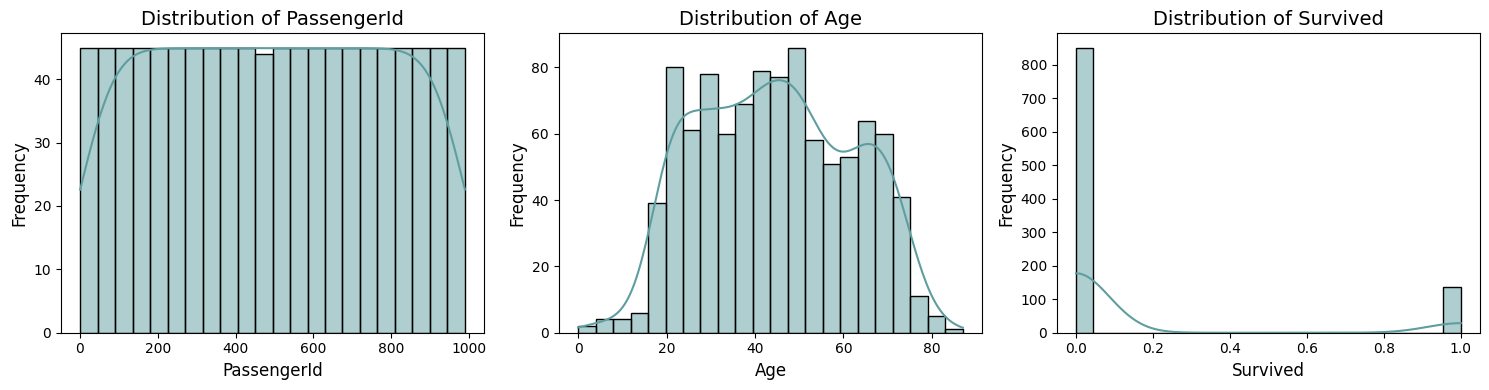

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

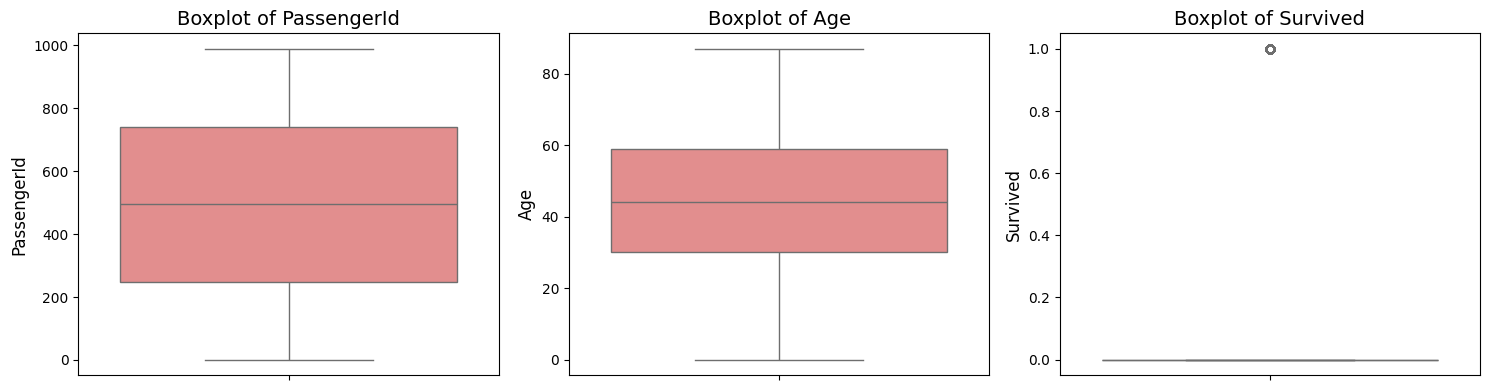

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

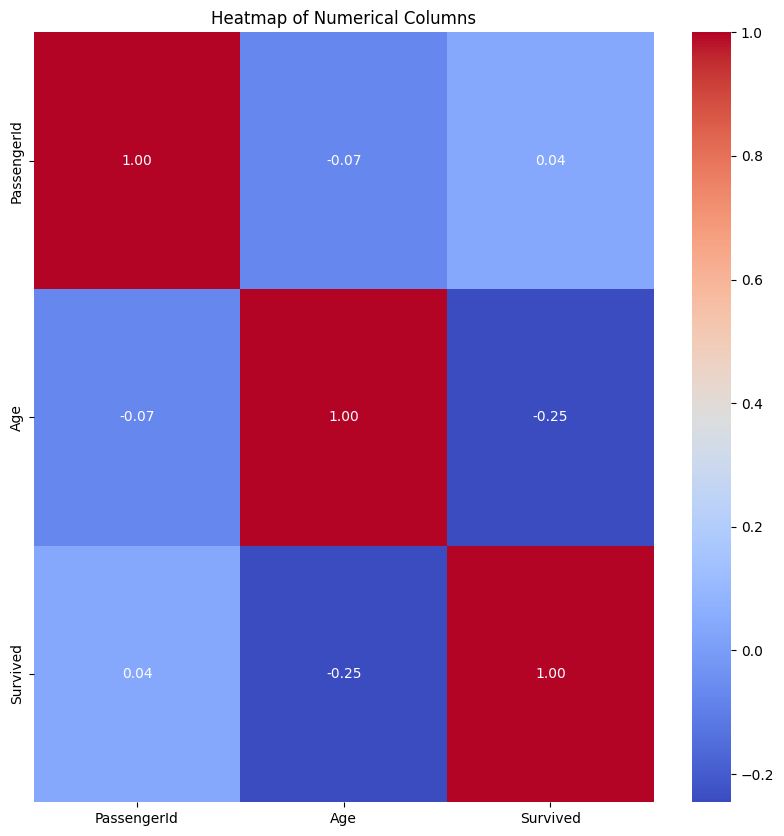

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [17]:
# Dropping unnecessary columns

df = df.drop(columns=['PassengerId'])

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [20]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [21]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7155425219941349, 0.718475073313783, 0.8563049853372434, 0.8563049853372434, 0.7331378299120235, 0.7859237536656891, 0.844574780058651, 0.8005865102639296, 0.5865102639296188]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       176
           1       0.68      0.78      0.73       165

    accuracy                           0.72       341
   macro avg       0.72      0.72      0.72       341
weighted avg       0.72      0.72      0.71       341

Confusion Matrix:
 [[115  61]
 [ 36 129]]


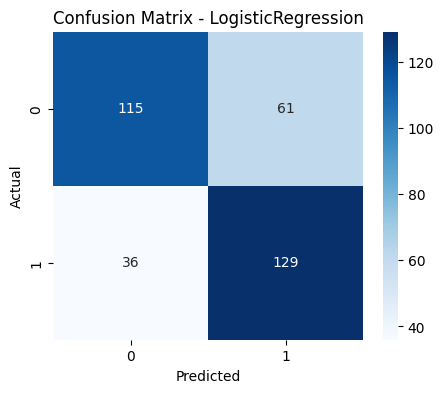

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.65      0.70       176
           1       0.68      0.79      0.73       165

    accuracy                           0.72       341
   macro avg       0.72      0.72      0.72       341
weighted avg       0.73      0.72      0.72       341

Confusion Matrix:
 [[114  62]
 [ 34 131]]


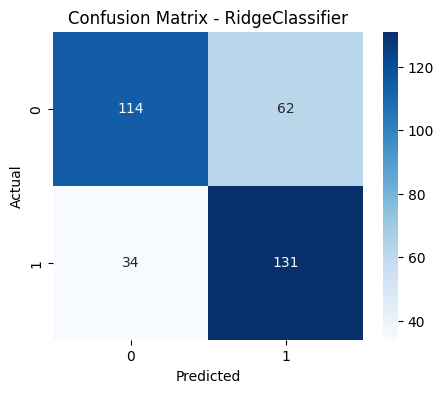

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86       176
           1       0.83      0.89      0.86       165

    accuracy                           0.86       341
   macro avg       0.86      0.86      0.86       341
weighted avg       0.86      0.86      0.86       341

Confusion Matrix:
 [[145  31]
 [ 18 147]]


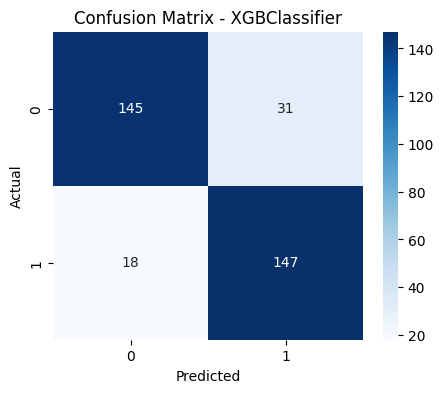

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       176
           1       0.81      0.90      0.86       165

    accuracy                           0.85       341
   macro avg       0.86      0.85      0.85       341
weighted avg       0.86      0.85      0.85       341

Confusion Matrix:
 [[142  34]
 [ 16 149]]


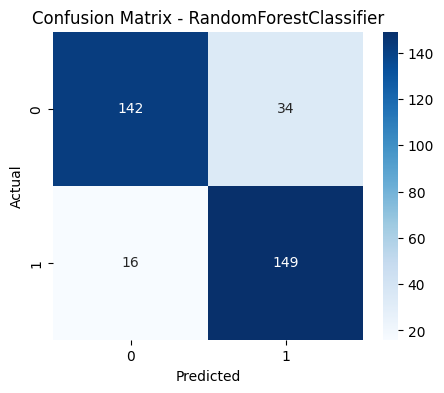

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.71       176
           1       0.68      0.85      0.76       165

    accuracy                           0.73       341
   macro avg       0.75      0.74      0.73       341
weighted avg       0.75      0.73      0.73       341

Confusion Matrix:
 [[109  67]
 [ 24 141]]


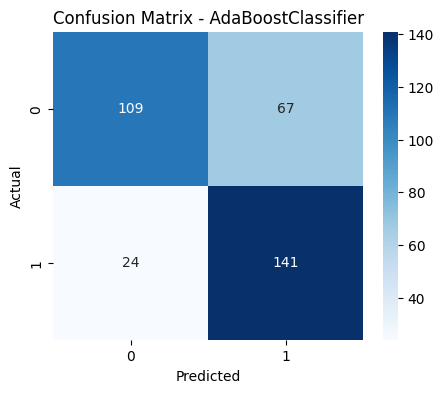

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       176
           1       0.75      0.84      0.79       165

    accuracy                           0.79       341
   macro avg       0.79      0.79      0.79       341
weighted avg       0.79      0.79      0.79       341

Confusion Matrix:
 [[129  47]
 [ 26 139]]


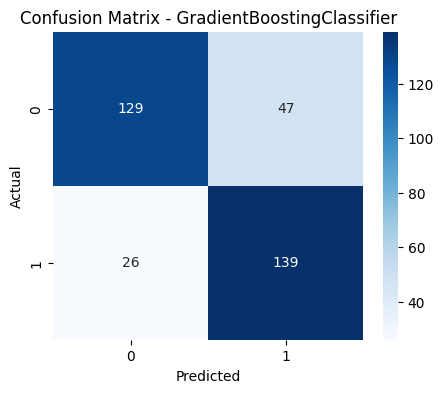

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       176
           1       0.79      0.84      0.82       165

    accuracy                           0.82       341
   macro avg       0.82      0.82      0.82       341
weighted avg       0.82      0.82      0.82       341

Confusion Matrix:
 [[139  37]
 [ 26 139]]


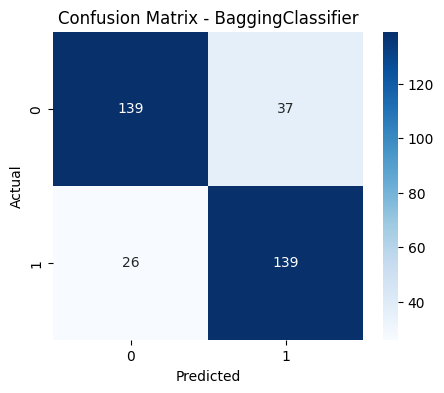

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       176
           1       0.77      0.88      0.82       165

    accuracy                           0.82       341
   macro avg       0.82      0.82      0.82       341
weighted avg       0.82      0.82      0.81       341

Confusion Matrix:
 [[133  43]
 [ 20 145]]


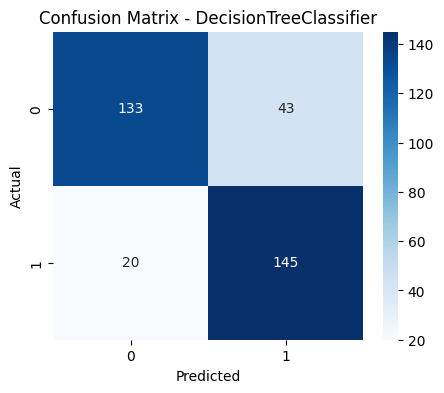

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58       176
           1       0.57      0.63      0.60       165

    accuracy                           0.59       341
   macro avg       0.59      0.59      0.59       341
weighted avg       0.59      0.59      0.59       341

Confusion Matrix:
 [[ 96  80]
 [ 61 104]]


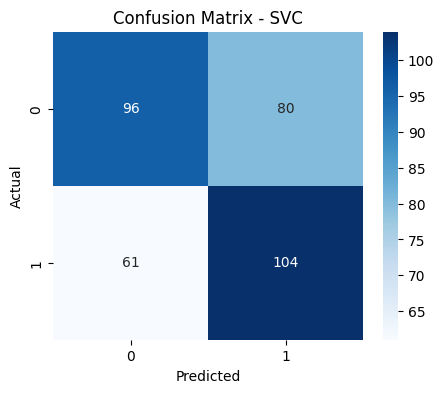

In [25]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()